In [42]:
# import libraries
import pandas as pd
from data_info import DataFrameTransform

In [43]:
# load the newly prepared dataset and see the first 5 lines with all the columns
pd.set_option('display.max_columns', None)
loan_df = pd.read_pickle('loan_prepared.pkl')
loan_df.head(5)

,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,41461848,68.552703,71.917538,118.515873,36.0,7.49,16.191570,A,A4,5 years,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,3.409480,6.748064,4.294532,4.294190,33.059257,50.574190,10.785255,0.0,0.0,0.0,2022-01-01,4.901657,2022-01-01,0.0,1,INDIVIDUAL
1,41440010,82.709437,87.057146,148.491608,36.0,6.99,19.659761,A,A3,9 years,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,3.775436,7.239415,4.390373,4.390011,38.826046,61.357926,12.007801,0.0,0.0,0.0,2022-01-01,5.283302,2022-01-01,0.0,1,INDIVIDUAL
2,41439961,88.866777,93.658255,161.893277,36.0,7.49,21.238311,A,A4,8 years,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,2.614207,5.455819,-0.000000,-0.000000,57.620261,98.987031,12.141757,0.0,0.0,0.0,2021-10-01,7.739696,2021-10-01,0.0,1,INDIVIDUAL
3,41439934,86.753132,91.391241,157.269348,36.0,14.31,21.519255,C,C4,1 year,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,2.409476,4.565021,-0.000000,-0.000000,56.655164,96.972626,12.557971,0.0,0.0,0.0,2021-06-01,7.791390,2021-06-01,0.0,1,INDIVIDUAL
4,41439927,86.753132,91.391241,157.269348,36.0,6.03,20.544147,A,A1,10+ years,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,4.538286,9.165659,4.412745,4.412377,40.279783,64.138303,11.943764,0.0,0.0,0.0,2022-01-01,5.370079,2022-01-01,0.0,1,INDIVIDUAL


In [44]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49337 entries, 0 to 54227
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   member_id                   49337 non-null  int64         
 1   loan_amount                 44945 non-null  float64       
 2   funded_amount               44945 non-null  float64       
 3   funded_amount_inv           44945 non-null  float64       
 4   term                        49337 non-null  float64       
 5   int_rate                    49337 non-null  float64       
 6   instalment                  44945 non-null  float64       
 7   grade                       49337 non-null  category      
 8   sub_grade                   49337 non-null  category      
 9   employment_length           49337 non-null  object        
 10  home_ownership              49337 non-null  category      
 11  annual_inc                  49337 non-null  float64       


## Current State of the Loans
Query the data to check the current state of payments. Summarise what percentage of the loans are recovered against the investor funding and the total amount funded.

In [45]:
# current status of the payments with value counts
loan_df['loan_status'].value_counts()

loan_status
Fully Paid                                             24644
Current                                                17612
Charged Off                                             4960
Does not meet the credit policy. Status:Fully Paid       894
Late (31-120 days)                                       516
Does not meet the credit policy. Status:Charged Off      325
In Grace Period                                          242
Late (16-30 days)                                         96
Default                                                   48
Name: count, dtype: int64

In [46]:
# Total amount funded
total_amount = loan_df['funded_amount'].sum()
total_amount


3737844.3919984424

In [47]:
# get the rows of the funded_amount where loans are fully paid
fully_paid_rows = loan_df['funded_amount'].loc[(loan_df['loan_status'] == 'Fully Paid') | (loan_df['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid')]
# sum the amount of the fully paid loans
fully_paid_amount = fully_paid_rows.sum()

In [48]:
# Calculate the percantage of the loans recovered
recovered_loans_pct = (fully_paid_amount / total_amount) * 100
print(f'The percentage of recovered loans is: {round(recovered_loans_pct, 2)}%')

The percentage of recovered loans is: 47.34%


## Calculating Loss
The company wants to check what percentage of loans have been a loss to the company. Loans marked as Charged Off in the loan_status column represent a loss to the company. 

Calculate the percentage of charged off loans historically and amount that was paid towards these loans before being charged off.

In [49]:
# number of rows in loan_status column
all_loans = len(loan_df['loan_status'])
# number of rows where loans are classified as Charged off
charged_off_loans = len(loan_df['loan_status'].loc[loan_df['loan_status'] == 'Charged Off'])
loss_pct = (charged_off_loans / all_loans) * 100
print(f'Percentage of loans with loss: {round(loss_pct, 2)}%')

Percentage of loans with loss: 10.05%


In [50]:
# Amount that was paid for these loans
charged_off_amount = loan_df['total_payment'].loc[loan_df['loan_status'] == 'Charged Off']
charged_off_total_amount = charged_off_amount.sum()
print(f'Total amount paid for the loans before being charged off: {round(charged_off_total_amount, 2)}')

Total amount paid for the loans before being charged off: 222393.46


## Projected Loss
Based on the interest rate of the loan and the loans term, you can calculate how much revenue the loan would have generated for the company. Perform this calculation to check the total percentage of expected revenue that was lost and the increase in revenue this would have been for the company.

In [51]:
# let's first create a new dataframe with the int_rate, loan term, loan_amount and total_payment where loans are being classified as charged off
projected_loss_df = loan_df[['int_rate', 'term', 'loan_amount', 'total_payment']].loc[loan_df['loan_status'] == 'Charged Off']
projected_loss_df.head()

,int_rate,term,loan_amount,total_payment
56,16.49,60.0,73.412661,35.426731
83,17.14,36.0,48.441296,24.241416
90,19.99,36.0,103.336366,42.460553
117,12.99,36.0,106.452226,52.276610
138,7.49,36.0,88.866777,40.516282


In [52]:
# assuming the int_rate is a yearly int_rate, let's create a new column with monthly int_rate
projected_loss_df['monthly_int_rate'] = projected_loss_df['int_rate'] / 12
# and another column with expected full amount paid after full term
projected_loss_df['expected_total_full_payment'] = projected_loss_df['loan_amount'] * projected_loss_df['monthly_int_rate']
# and the last column where we calculate the difference between total_payment and expected_payment
projected_loss_df['payment_loss_difference'] = projected_loss_df['expected_total_full_payment'] - projected_loss_df['total_payment']
# Let's have a look if all columns are created correctly
projected_loss_df.head()

,int_rate,term,loan_amount,total_payment,monthly_int_rate,expected_total_full_payment,payment_loss_difference
56,16.49,60.0,73.412661,35.426731,1.374167,100.881232,65.454501
83,17.14,36.0,48.441296,24.241416,1.428333,69.190318,44.948902
90,19.99,36.0,103.336366,42.460553,1.665833,172.141162,129.680609
117,12.99,36.0,106.452226,52.276610,1.082500,115.234535,62.957925
138,7.49,36.0,88.866777,40.516282,0.624167,55.467680,14.951397


In [53]:
# percentage calculation of the loss
total_expected_income = projected_loss_df['expected_total_full_payment'].sum()
total_payment_received = projected_loss_df['total_payment'].sum()
pct_loss = (total_payment_received / total_expected_income) * 100
print(f'Percentage of the revenue that was lost in the Charged Off loans: {round(pct_loss, 2)}%')

Percentage of the revenue that was lost in the Charged Off loans: 49.32%


## Possible Loss
What percentage of customers who are currently behind with their loan payments represent as a percentage of all loans? Calculate the total amount of customers in this bracket and how much loss the company would loss if these users status changed to Charged Off. What is the projected loss of these loans if the customer were to finish the loans term? 

If customers converted to Charged Off, what percentage of total revenue do these customers and the customers who have already defaulted on their loan represent?

In [54]:
# current status of the payments with value counts
loan_df['loan_status'].value_counts()

loan_status
Fully Paid                                             24644
Current                                                17612
Charged Off                                             4960
Does not meet the credit policy. Status:Fully Paid       894
Late (31-120 days)                                       516
Does not meet the credit policy. Status:Charged Off      325
In Grace Period                                          242
Late (16-30 days)                                         96
Default                                                   48
Name: count, dtype: int64

Customers that are behind belongs to two categories (late (31-120 days) and Late (16-30 days))

In [55]:
number_customers_behind = loan_df['loan_status'].loc[(loan_df['loan_status'] == 'Late (31-120 days)') | (loan_df['loan_status'] == 'Late (16-30 days)')]
len(number_customers_behind)

612

In [56]:
# calculate percentage of customers behind
pct_customer_behind = (len(number_customers_behind) / all_loans) * 100
print(f'Percentage of customers behind their scheduled payments: {round(pct_customer_behind, 2)}')

Percentage of customers behind their scheduled payments: 1.24


In [57]:
# If customers changed the status to Charged off. Projected percentage revenue loss
# let's created a seperate dataframe with columns needed for the projection
late_to_charged_projection_df = loan_df[['int_rate', 'term', 'loan_amount', 'total_payment']].loc[(loan_df['loan_status'] == 'Late (31-120 days)') | (loan_df['loan_status'] == 'Late (16-30 days)')]

In [58]:
late_to_charged_projection_df.head()

,int_rate,term,loan_amount,total_payment
17,13.66,60.0,36.173948,18.717622
140,14.99,36.0,74.545426,36.390794
168,8.67,36.0,47.260433,24.059900
171,13.16,36.0,57.407091,28.995766
243,11.44,36.0,74.545426,35.562204


In [59]:
# assuming the int_rate is a yearly int_rate, let's create a new column with monthly int_rate
late_to_charged_projection_df['monthly_int_rate'] = late_to_charged_projection_df['int_rate'] / 12
# and another column with expected full amount paid after full term
late_to_charged_projection_df['expected_total_full_payment'] = late_to_charged_projection_df['loan_amount'] * late_to_charged_projection_df['monthly_int_rate']
# Let's have a look if all columns are created correctly
late_to_charged_projection_df.head()

,int_rate,term,loan_amount,total_payment,monthly_int_rate,expected_total_full_payment
17,13.66,60.0,36.173948,18.717622,1.138333,41.178011
140,14.99,36.0,74.545426,36.390794,1.249167,93.119661
168,8.67,36.0,47.260433,24.059900,0.722500,34.145663
171,13.16,36.0,57.407091,28.995766,1.096667,62.956443
243,11.44,36.0,74.545426,35.562204,0.953333,71.066640


In [60]:
# percentage calculation of the loss
total_expected_income = late_to_charged_projection_df['expected_total_full_payment'].sum()
total_payment_received = late_to_charged_projection_df['total_payment'].sum()
pct_loss = (total_payment_received / total_expected_income) * 100
print(f'Percentage of the revenue that was lost in the Charged Off loans: {round(pct_loss, 2)}%')

Percentage of the revenue that was lost in the Charged Off loans: 44.83%


In [61]:
# percentage of customers delayed and defaulted 
defaulted_customers = loan_df['loan_status'].loc[loan_df['loan_status'] == 'Default']
behind_default_total = len(number_customers_behind) + len(defaulted_customers)
pct_behind_default = (behind_default_total / all_loans) * 100
print(f'Percentage of customers behind with their payments and defaulted customers: {round(pct_behind_default, 2)}%')

Percentage of customers behind with their payments and defaulted customers: 1.34%


## Indicators of Loss
To find out some of the indicators of loss it is important to see whether there is a correlation between customers who have the loan_status charged off or late an some of the other variables.
The initial set of variables identified worth exploring the corrlation are:
1. loan_amount
2. int_rate
3. instalment
4. grade
5. annual_inc
6. purpose
7. dti


In [72]:
# first let's try to figure out if there are any strongly correlated variables to those users with delayed payment or charged off
loan_status_df = loan_df.loc[loan_df['loan_status'].isin(['Late (31-120 days)', 'Late (16-30 days)', 'Charged Off'])]
loan_status_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5572 entries, 17 to 54156
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   member_id                   5572 non-null   int64         
 1   loan_amount                 5118 non-null   float64       
 2   funded_amount               5118 non-null   float64       
 3   funded_amount_inv           5118 non-null   float64       
 4   term                        5572 non-null   float64       
 5   int_rate                    5572 non-null   float64       
 6   instalment                  5118 non-null   float64       
 7   grade                       5572 non-null   category      
 8   sub_grade                   5572 non-null   category      
 9   employment_length           5572 non-null   object        
 10  home_ownership              5572 non-null   category      
 11  annual_inc                  5572 non-null   float64       


In [74]:
# drop date and unimportant columns from this dataframe
loan_status_df.drop(['member_id', 'issue_date', 'earliest_credit_line', 'last_payment_date', 'last_credit_pull_date', 'application_type'], axis=1, inplace=True)
loan_status_df.head()


/var/folders/lc/050p8jk91r75tdrmpqhwhzz80000gn/T/ipykernel_99310/633364569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_status_df.drop(['member_id', 'issue_date', 'earliest_credit_line', 'last_payment_date', 'last_credit_pull_date', 'application_type'], axis=1, inplace=True)


,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,loan_status,payment_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount,collections_12_mths_ex_med,policy_code
17,36.173948,83.956164,55.311441,60.0,13.66,7.945943,C,C3,10+ years,MORTGAGE,52000.0,Verified,Late (31-120 days),n,debt_consolidation,8.98,2,6,3.775436,7.694189,3.898680,3.898415,18.717622,25.742062,6.632580,0.0,0.00,0.0000,3.547389,0.0,1
56,73.412661,77.108661,128.062822,60.0,16.49,17.608562,D,D3,3 years,RENT,94000.0,Not Verified,Charged Off,n,debt_consolidation,26.95,0,1,3.885363,6.998794,4.332416,4.330031,35.426731,54.727310,11.985083,0.0,0.00,0.0000,5.066343,0.0,1
83,48.441296,50.517398,78.246064,36.0,17.14,11.044690,D,D4,< 1 year,MORTGAGE,28000.0,Not Verified,Charged Off,n,debt_consolidation,38.66,0,0,3.126543,5.921949,4.092320,4.092020,24.241416,34.930935,8.115996,0.0,0.00,0.0000,4.161161,0.0,1
90,103.336366,109.204826,194.171139,36.0,19.99,21.893880,E,E3,10+ years,RENT,34000.0,Source Verified,Charged Off,n,debt_consolidation,23.40,0,0,2.969557,6.874762,4.527151,4.526756,42.460553,68.353396,16.084288,0.0,0.00,0.0000,5.495643,0.0,1
117,106.452226,112.558391,201.257017,36.0,12.99,28.019553,C,C2,2 years,RENT,70000.0,Source Verified,Charged Off,n,debt_consolidation,13.12,1,2,3.659957,9.426455,4.519651,4.519257,52.276610,87.938295,18.893051,0.0,1192.58,214.6644,5.982265,0.0,1


In [75]:
# change employment_length into a category column
loan_tf = DataFrameTransform(loan_status_df)
loan_tf.column_to_categorical('employment_length')

/Users/robertgore/Desktop/DataScienceCourse/AI_Core/exploratory-data-analysis---customer-loans-in-finance871/data_info.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataframe[column_name] = self.dataframe[column_name].astype(


,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,loan_status,payment_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount,collections_12_mths_ex_med,policy_code
17,36.173948,83.956164,55.311441,60.0,13.66,7.945943,C,C3,10+ years,MORTGAGE,52000.0,Verified,Late (31-120 days),n,debt_consolidation,8.98,2,6,3.775436,7.694189,3.898680,3.898415,18.717622,25.742062,6.632580,0.0,0.000000,0.0000,3.547389,0.0,1
56,73.412661,77.108661,128.062822,60.0,16.49,17.608562,D,D3,3 years,RENT,94000.0,Not Verified,Charged Off,n,debt_consolidation,26.95,0,1,3.885363,6.998794,4.332416,4.330031,35.426731,54.727310,11.985083,0.0,0.000000,0.0000,5.066343,0.0,1
83,48.441296,50.517398,78.246064,36.0,17.14,11.044690,D,D4,< 1 year,MORTGAGE,28000.0,Not Verified,Charged Off,n,debt_consolidation,38.66,0,0,3.126543,5.921949,4.092320,4.092020,24.241416,34.930935,8.115996,0.0,0.000000,0.0000,4.161161,0.0,1
90,103.336366,109.204826,194.171139,36.0,19.99,21.893880,E,E3,10+ years,RENT,34000.0,Source Verified,Charged Off,n,debt_consolidation,23.40,0,0,2.969557,6.874762,4.527151,4.526756,42.460553,68.353396,16.084288,0.0,0.000000,0.0000,5.495643,0.0,1
117,106.452226,112.558391,201.257017,36.0,12.99,28.019553,C,C2,2 years,RENT,70000.0,Source Verified,Charged Off,n,debt_consolidation,13.12,1,2,3.659957,9.426455,4.519651,4.519257,52.276610,87.938295,18.893051,0.0,1192.580000,214.6644,5.982265,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54122,NaN,NaN,NaN,36.0,10.28,NaN,C,C1,10+ years,MORTGAGE,45600.0,Not Verified,Charged Off,n,other,3.26,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,459.490000,124.8800,NaN,0.0,1
54124,NaN,NaN,NaN,36.0,12.49,NaN,D,D3,8 years,MORTGAGE,39000.0,Not Verified,Charged Off,n,debt_consolidation,5.08,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1909.870000,668.3600,NaN,0.0,1
54130,NaN,NaN,NaN,36.0,13.75,NaN,E,E2,< 1 year,RENT,62200.0,Not Verified,Charged Off,n,debt_consolidation,9.80,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,150.100000,1.6000,NaN,0.0,1
54152,NaN,NaN,NaN,36.0,12.17,NaN,D,D2,9 years,MORTGAGE,70000.0,Not Verified,Charged Off,n,credit_card,10.20,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,102.910000,1.0400,NaN,0.0,1


In [76]:
loan_status_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5572 entries, 17 to 54156
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   loan_amount                 5118 non-null   float64 
 1   funded_amount               5118 non-null   float64 
 2   funded_amount_inv           5118 non-null   float64 
 3   term                        5572 non-null   float64 
 4   int_rate                    5572 non-null   float64 
 5   instalment                  5118 non-null   float64 
 6   grade                       5572 non-null   category
 7   sub_grade                   5572 non-null   category
 8   employment_length           5572 non-null   category
 9   home_ownership              5572 non-null   category
 10  annual_inc                  5572 non-null   float64 
 11  verification_status         5572 non-null   category
 12  loan_status                 5572 non-null   category
 13  payment_plan         

In [79]:
# encode all the category columns into integers using scikit-learn LabelEncode method
columns_to_encode = ['grade', 'sub_grade', 'employment_length', 'home_ownership', 'verification_status', 'loan_status', 'payment_plan', 'purpose']
loan_tf.encode_categorical_columns(columns_to_encode)

/Users/robertgore/anaconda3/envs/eda_project/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/robertgore/anaconda3/envs/eda_project/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/robertgore/Desktop/DataScienceCourse/AI_Core/exploratory-data-analysis---customer-loans-in-finance871/data_info.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.datafram

<Axes: >

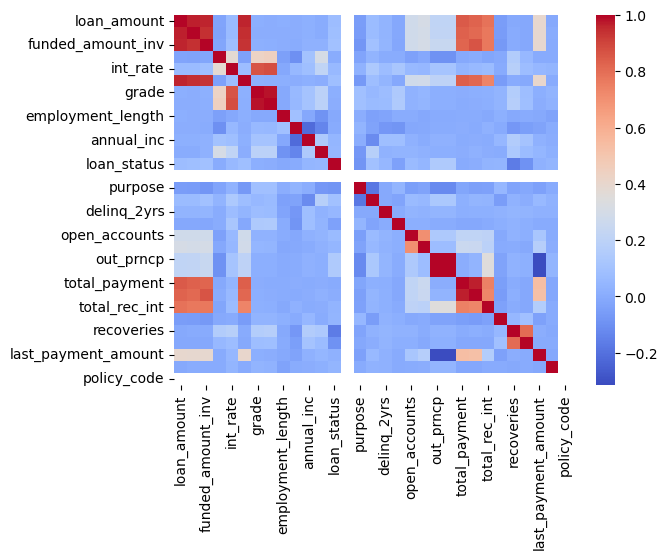

In [81]:
# and finally see the heatmap
# let't try heatmat straight away to see if there's any obvious correlation
import seaborn as sns
sns.heatmap(loan_status_df.corr(), cmap='coolwarm')

The above heatmap does not show any strong correlation of the loan_status column with any other columns apart from itself. This might be indicating a false positive and mistake in the dataframe and the filtration or loan status customers with the specified status do not have any correlation with any other columns.